In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
import seaborn as sns

In [2]:
data = pd.read_csv('hierarchical - hierarchical.csv')
data.head()

x         y          z
0  153.588500  33.07160   46.68676
1   36.024890  41.39830  127.10090
2    4.513605  42.45976  132.80750
3  146.028700  37.32747   57.05478
4   44.393090  43.69293  118.49990

In [3]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(data)
scaler.fit(data)
data=scaler.transform(data)
data = pd.DataFrame(data,columns=['x','y','z'])
data.head()

x         y         z
0  1.499552 -0.437622 -1.159726
1 -0.600506 -0.052282  1.489341
2 -1.163398 -0.003160  1.677332
3  1.364510 -0.240671 -0.818174
4 -0.451024  0.053908  1.206000

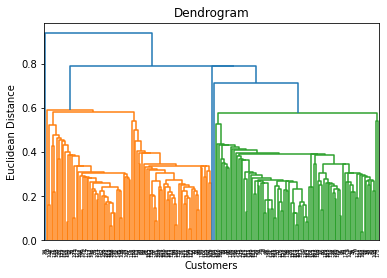

In [4]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(data, method="single"))  
plt.title("Dendrogram")  
plt.ylabel("Euclidean Distance")  
plt.xlabel("Customers")  
plt.show()  

In [5]:
from sklearn.cluster import AgglomerativeClustering  
hc2= AgglomerativeClustering(n_clusters=2, metric='l2', linkage='single')  
y_pred= hc2.fit_predict(data) 
data['label2']=y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

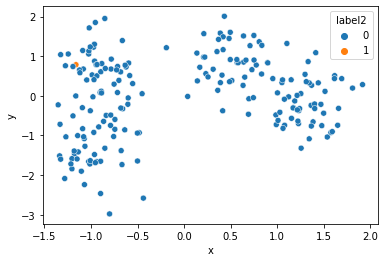

In [6]:
sns.scatterplot(data=data,x='x',y='y',hue='label2')

In [7]:
import plotly.express as px

fig = px.scatter_3d(data, x='x', y='y', z='z',color='label2')
fig.show()

In [8]:
hc3= AgglomerativeClustering(n_clusters=3, metric='l2', linkage='single')  
y_pred= hc3.fit_predict(data) 
data['label3']=y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

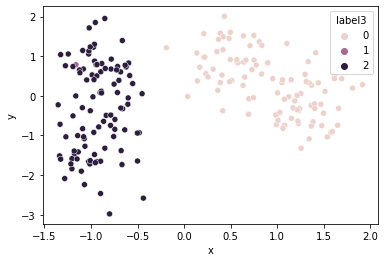

In [9]:
sns.scatterplot(data=data,x='x',y='y',hue='label3')

In [10]:
fig = px.scatter_3d(data, x='x', y='y', z='z',color='label3')
fig.show()

In [11]:
hc4= AgglomerativeClustering(n_clusters=4, metric='l2', linkage='single')  
y_pred= hc4.fit_predict(data) 
data['label4']=y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

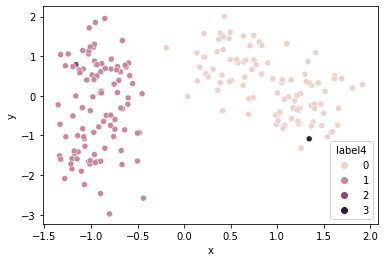

In [12]:
sns.scatterplot(data=data,x='x',y='y',hue='label4')

In [13]:
fig = px.scatter_3d(data, x='x', y='y', z='z',color='label4')
fig.show()

In [14]:
hc5= AgglomerativeClustering(n_clusters=5, metric='l2', linkage='single')  
y_pred= hc5.fit_predict(data) 
data['label5']=y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

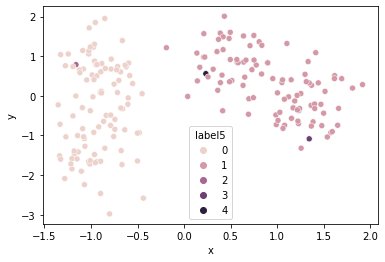

In [16]:
sns.scatterplot(data=data,x='x',y='y',hue='label5')

In [17]:
fig = px.scatter_3d(data, x='x', y='y', z='z',color='label5')
fig.show()

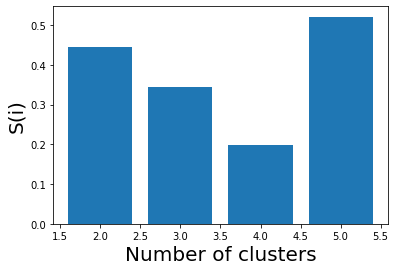

In [18]:
k = [2,3,4,5]

# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(silhouette_score(data, hc2.fit_predict(data)))
silhouette_scores.append(silhouette_score(data, hc3.fit_predict(data)))
silhouette_scores.append(silhouette_score(data, hc4.fit_predict(data)))
silhouette_scores.append(silhouette_score(data, hc5.fit_predict(data)))

plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()
